## Cost of Product & Prior Purchase EDA

In [34]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
from textwrap import wrap
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

## Load Data & Describe

In [5]:
data = pd.read_csv('commerce.csv')
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [10]:
data.sample(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
2562,2563,D,Ship,4,3,191,3,high,F,45,3714,1
3641,3642,F,Ship,5,1,162,3,medium,M,5,4064,1
1545,1546,B,Ship,4,3,251,3,medium,F,46,2632,1
848,849,A,Ship,3,1,191,3,high,F,60,2069,1
3784,3785,C,Ship,4,3,247,10,high,M,10,5644,0
8340,8341,D,Road,5,5,261,6,medium,F,1,1082,0
2933,2934,F,Ship,6,3,273,4,medium,F,32,2532,1
7631,7632,F,Ship,5,4,225,2,low,M,8,4725,0
3046,3047,C,Ship,5,2,225,3,medium,M,1,2049,1
4915,4916,F,Road,3,2,252,3,medium,M,7,4507,0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [17]:
num_type = ['int64','float64']

num_data = data.select_dtypes(include=num_type)
nums = num_data.columns

print(nums)

Index(['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')


In [18]:
cat_type = ['object']

cat_data = data.select_dtypes(include=cat_type)
cat = cat_data.columns

print(cat)

Index(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], dtype='object')


In [19]:
nums = ['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']
cats = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

In [25]:
data[nums].describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


Beberapa pengamatan dari *statistical summary* kolom numerik di atas:
1. Mean dan Median dari `Cost_of_the_product` & `Prior_Purchase` tidak berbeda jauh (terdistribusi normal)
2. Nilai min & max juga masih makse sense

In [30]:
data[cats].describe()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


# Univariate Analysis

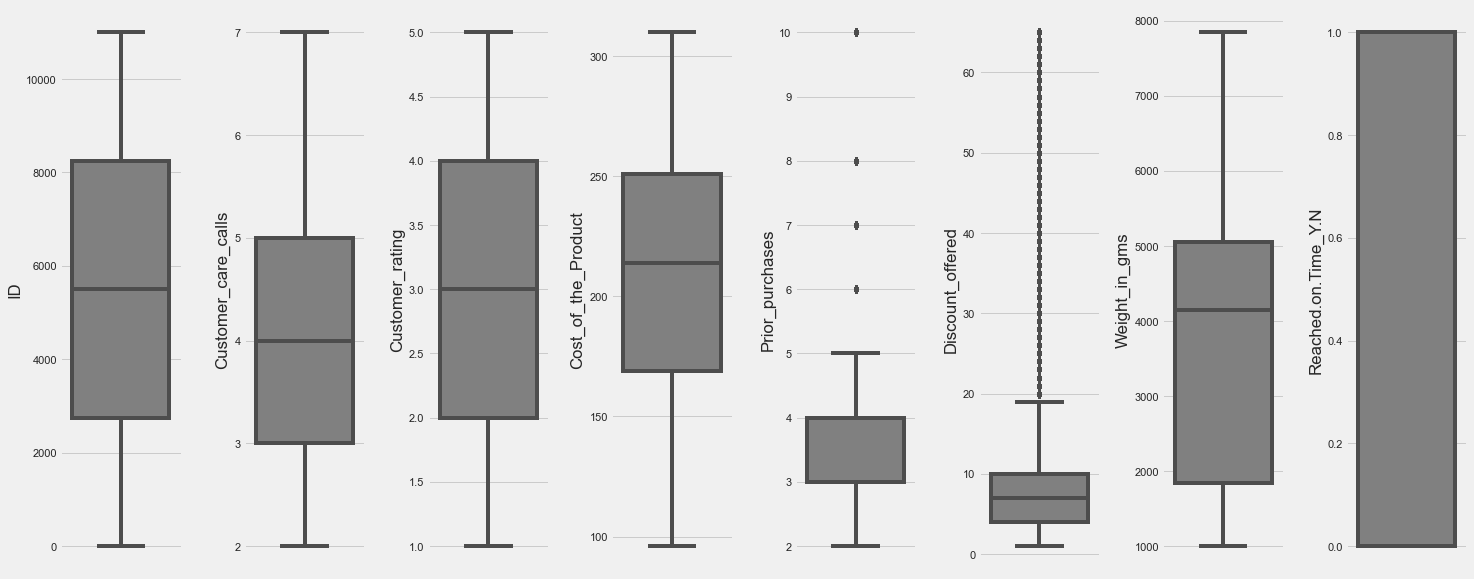

In [36]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=data[nums[i]], color='gray', orient='v')
    plt.tight_layout()

Dari kolom Cost_of_the_product dan Prior Purchase
* Outlier terlihat utamanya pada kolom `Prior_purchase`